#### Frame the problem

Predicting a target value of median house value

#### Choose the algorithm

Machine learning technique: Supervised learning 

Algorithm: Linear regression

#### Linear Regression
Linear regression is a machine learning algorthm based on supervised learning. It is mostly used to find the relationship between independent variables (**features** ). It is often used to predict a numeric value called the **target**.

#### Import libraries

In [97]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Obtain and load the Data

Source: Downloaded from Kaggle [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

About this dataset:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block - How much that house is worth (measured in US Dollars)

10. oceanProximity: Location of the house in proximity to the ocean/sea

our **target** is medianHouseValue which is present in the data. 
The target is the most important feature in this dataset because the machine learns how to predict this value.

In this notebook, the machine looks at the other features and learns how to predict the medianHouseValue also called the target

In [98]:
housing_df = pd.read_csv('./data/housing.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Exploratory Data Analysis (EDA)

In [99]:
display(housing_df.info())

num_of_observations = housing_df.shape[0]
num_of_features = housing_df.shape[1]
num_of_categorical_features = housing_df.select_dtypes(include=['object']).shape[1]
num_of_numerical_features = housing_df.select_dtypes(include=[np.number]).shape[1]

categorical_features = housing_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = housing_df.select_dtypes(include=[np.number]).columns.tolist()

print("\nDataset Overview:")
print(f"\nThe data includes {num_of_observations} observations and {num_of_features} features.")

print(f"\nOut of {num_of_features} features, {num_of_categorical_features} are categorical features and {num_of_numerical_features} are numerical features.")
print(f"    Categorical features: {categorical_features}")
print(f"    Numerical features: {numerical_features}")

num_of_missing_total_bedrooms = housing_df["total_bedrooms"].isnull().sum()
print(f"\nOnly total_bedrooms feature contains {num_of_missing_total_bedrooms} missing values in the dataset. The rest of the features contain no missing values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None


Dataset Overview:

The data includes 20640 observations and 10 features.

Out of 10 features, 1 are categorical features and 9 are numerical features.
    Categorical features: ['ocean_proximity']
    Numerical features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

Only total_bedrooms feature contains 207 missing values in the dataset. The rest of the features contain no missing values.


In [100]:
display(housing_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


#### Visualization - identify the relationship between each feature or attribute
Visualization helps with underestanding the relationship between the target variable and other features

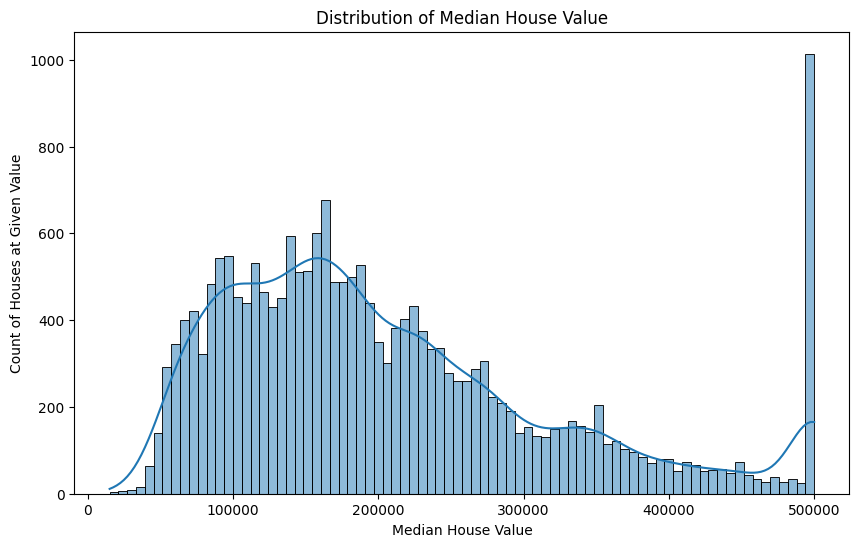

In [101]:
# Plot the distribution of the target variable 'median_house_value' using histogram

plt.figure(figsize=(10, 6))
sns.histplot(housing_df['median_house_value'], bins=80, kde=True) # bins is amount of columns and kde is smoothness
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Count of Houses at Given Value')
plt.show()

In [102]:
print("By looking at the histogram, we can observe the presence of outliers in the 'median_house_value' column, especially at the higher end of the value range. ")
print("This suggests that there are a few houses with significantly higher values compared to the majority, which could potentially skew our regression model if not addressed.")

By looking at the histogram, we can observe the presence of outliers in the 'median_house_value' column, especially at the higher end of the value range. 
This suggests that there are a few houses with significantly higher values compared to the majority, which could potentially skew our regression model if not addressed.


#### Data Preprocessing

#### Train and Test split

#### Define a Model

#### Train the Model

#### Evaluate the Model

#### Testing the model